In [1]:
import omnitool
from omnitool.literature_values import *
import barbershop

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
'''We'll use the asteroseismic data from Yu et al. 2018'''
#Read in Jie Yu
sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table1.txt'
yu18_1 = pd.read_csv(sfile, sep='|')
sfile = '/home/oliver/PhD/Catalogues/RC_catalogues/Yu+18_table2.txt'
yu18_2 = pd.read_csv(sfile, sep='|')
df = pd.merge(yu18_1, yu18_2, on='KICID',how='outer')
df.rename(columns={'KICID':'KIC',
                    'EvoPhase':'stage',
                    'err_x':'numax_err',
                    'err.1_x':'dnu_err',
                    'err_y':'Teff_err',
                     'Fe/H':'[Fe/H]',
                    'err.2_y':'[Fe/H]_err',
                    'err.1_y':'logg_err',
                    'err.3_y':'M_err',
                    'err.4_y':'R_err'},inplace=True) #For consistency
df.head(2)
print(list(df))

['KIC', 'kepmag', 'Length_Quarters', 'Length_days', 'numax', 'numax_err', 'dnu', 'dnu_err', 'amplitude', 'err.2_x', 'fwhm', 'err.3_x', 'maxbg', 'err.4_x', 'Unnamed: 14', 'Teff', 'Teff_err', 'logg', 'logg_err', '[Fe/H]', '[Fe/H]_err', 'M_noCorrection', 'M_err', 'R_noCorrection', 'R_err', 'M_RGB', 'err.5', 'R_RGB', 'err.6', 'M_Clump', 'err.7', 'R_Clump', 'err.8', 'stage', 'Unnamed: 20']


In [3]:
#Lets run the scaling relations
sc = omnitool.scalings(df.numax, df.dnu, df. Teff,\
                       _numax_err = df.numax_err, _dnu_err = df.dnu_err,\
                       _Teff_err = df.Teff_err)

df['R'] = sc.get_radius()/Rsol
df['R_err_omn'] = sc.get_radius_err()/Rsol
df['M'] = sc.get_mass()/Msol
df['M_err_omn'] = sc.get_mass_err()/Msol
df['logg_omn'] = sc.get_logg()
df['logg_err_omn'] = sc.get_logg_err()

## Lets compare values and uncertainties to those in Yu18

Uncorrected R vs omnitool R

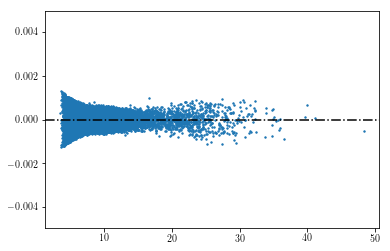

In [4]:
plt.scatter(df.R_noCorrection, (df.R_noCorrection - df.R)/df.R_noCorrection, s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.show()

Uncorrected M vs omnitool M

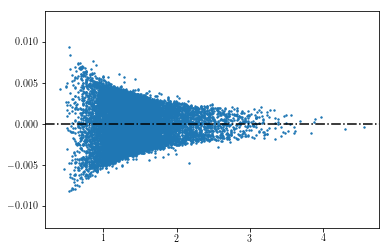

In [5]:
plt.scatter(df.M_noCorrection, (df.M_noCorrection - df.M)/df.M_noCorrection, s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.show()

Logg vs omnitool logg

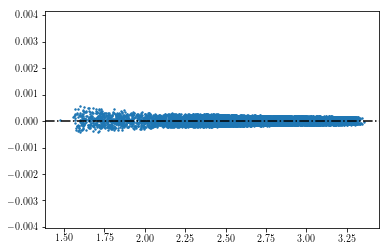

In [6]:
plt.scatter(df.logg, (df.logg - df.logg_omn)/df.logg, s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.show()

## Conclusions:
The differences are tiny and inline with expected scatter.

## And now the uncertainties

Uncorrected R vs omnitool R

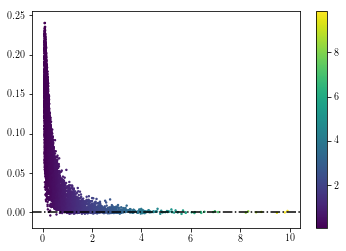

In [17]:
plt.scatter(df.R_err, (df.R_err - df.R_err_omn)/df.R_err, c=df.R_err_omn,s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.colorbar()
plt.show()

Uncorrected M vs omnitool M

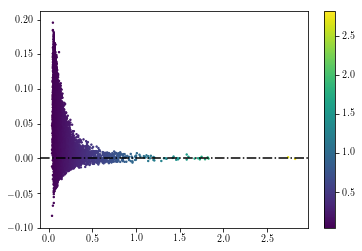

In [16]:
plt.scatter(df.M_err, (df.M_err - df.M_err_omn)/df.M_err, c=df.M_err_omn, s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.colorbar()
plt.show()

Logg vs omnitool logg

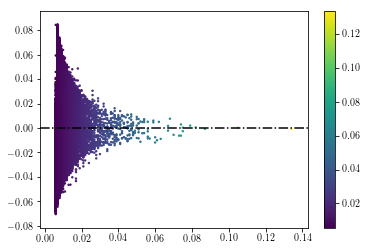

In [13]:
plt.scatter(df.logg_err, (df.logg_err - df.logg_err_omn)/df.logg_err, c=df.logg_err_omn,s=2)
plt.axhline(0., c='k', linestyle='-.')
plt.colorbar()
plt.show()

## Conclusions:
Our uncertainties seem to differ somewhat from those in Yu et al's work, which is surprising for the uncorrected data. Given that this varies as a function of their errors as well as ours though it looks like its probably an effect of a small change having a larger effect at small values.

# I'm closing this issue.

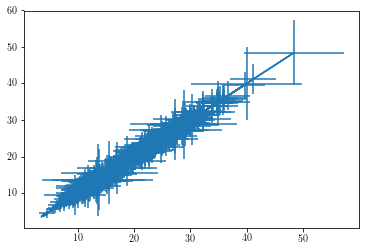

In [10]:
plt.errorbar(df.R_noCorrection, df.R, xerr = df.R_err, yerr=df.R_err_omn)
plt.show()

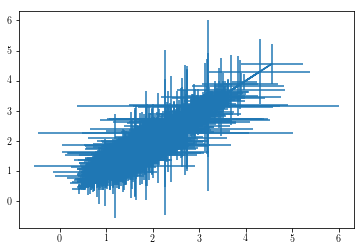

In [11]:
plt.errorbar(df.M_noCorrection, df.M, xerr = df.M_err, yerr=df.M_err_omn)
plt.show()

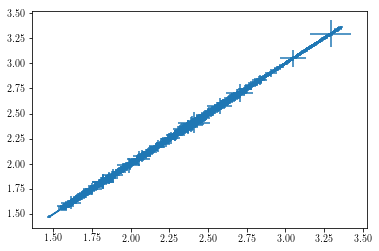

In [12]:
plt.errorbar(df.logg, df.logg_omn, xerr = df.logg_err, yerr=df.logg_err_omn)
plt.show()